In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [0]:
from google.colab import files

In [0]:
file = files.upload()

Saving UCMerced_LandUse.zip to UCMerced_LandUse.zip


In [0]:
!unzip "/content/UCMerced_LandUse.zip"

Archive:  /content/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerc

In [0]:
X=[]
Z=[]
IMG_SIZE=150
#AGRI_DIR='/content/UCMerced_LandUse/Images/agricultural' 
AIRPLANE_DIR='/content/UCMerced_LandUse/Images/airplane'
BASEBALLDIAMOND_DIR='/content/UCMerced_LandUse/Images/baseballdiamond'
BEACH_DIR='/content/UCMerced_LandUse/Images/beach'
BUILDINGS_DIR='/content/UCMerced_LandUse/Images/buildings'
CHAPARRAL_DIR='/content/UCMerced_LandUse/Images/chaparral'
DENSEL_DIR='/content/UCMerced_LandUse/Images/denseresidential'
FOREST_DIR='/content/UCMerced_LandUse/Images/forest'
FREEWAY_DIR='/content/UCMerced_LandUse/Images/freeway'
GOLFCOURSE_DIR='/content/UCMerced_LandUse/Images/golfcourse'
HARBOR_DIR='/content/UCMerced_LandUse/Images/harbor'
INTERSECTION_DIR='/content/UCMerced_LandUse/Images/intersection'
MEDIUML_DIR='/content/UCMerced_LandUse/Images/mediumresidential'
MOBILEHOMEPARK_DIR='/content/UCMerced_LandUse/Images/mobilehomepark'
OVERPASS_DIR='/content/UCMerced_LandUse/Images/overpass'
PARKINGLOT_DIR='/content/UCMerced_LandUse/Images/parkinglot'
RIVER_DIR='/content/UCMerced_LandUse/Images/river'
RUNWAY_DIR='/content/UCMerced_LandUse/Images/runway'
SPARSE_DIR='/content/UCMerced_LandUse/Images/sparseresidential'
STORAGE_DIR='/content/UCMerced_LandUse/Images/storagetanks'
TENNIS_DIR='/content/UCMerced_LandUse/Images/tenniscourt'

In [0]:
def assign_label(img,image_type):
    return image_type

In [0]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:

from tqdm import tqdm

In [66]:
make_train_data('Agricultural',AGRI_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1060.53it/s]

100


In [67]:
make_train_data('Airplane',AIRPLANE_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1302.70it/s]

200


In [68]:
make_train_data('BaseballDiamond',BASEBALLDIAMOND_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1067.74it/s]

300


In [69]:
make_train_data('Beach',BEACH_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 904.40it/s]

400


In [70]:
make_train_data('Buildings',BUILDINGS_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1021.00it/s]

500


In [71]:
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1160.56it/s]

600


In [72]:
make_train_data('DenseResidential',DENSEL_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1227.19it/s]

700


In [73]:
make_train_data('Forest',FOREST_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1153.61it/s]

800


In [74]:
make_train_data('Freeway',FREEWAY_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1256.55it/s]

900


In [75]:
make_train_data('Golfcourse',GOLFCOURSE_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1049.98it/s]

1000


In [76]:
make_train_data('Harbor',HARBOR_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1096.60it/s]

1100


In [77]:
make_train_data('Intersection',INTERSECTION_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1178.22it/s]

1200


In [78]:
make_train_data('MediumResidential',MEDIUML_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1394.33it/s]

1300


In [79]:
make_train_data('MobileHomePark',MOBILEHOMEPARK_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1275.68it/s]

1400


In [80]:
make_train_data('Overpass',OVERPASS_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1543.35it/s]

1500


In [81]:
make_train_data('ParkingLot',PARKINGLOT_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1076.93it/s]

1600


In [82]:
make_train_data('River',RIVER_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1548.50it/s]

1700


In [83]:
make_train_data('Runway',RUNWAY_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1468.75it/s]

1800


In [84]:
make_train_data('SparseResidential',SPARSE_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1423.36it/s]

1900


In [85]:
make_train_data('StorageTanks',STORAGE_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1140.78it/s]

2000


In [86]:
make_train_data('TennisCourt',TENNIS_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 1166.84it/s]

2100


In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [0]:
batch_size=21
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 96)       

In [95]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/10
75/75 [==============================] - 102s 1s/step - loss: 0.1873 - acc: 0.9523 - val_loss: 0.1769 - val_acc: 0.9516
Epoch 2/10
75/75 [==============================] - 98s 1s/step - loss: 0.1688 - acc: 0.9523 - val_loss: 0.1549 - val_acc: 0.9533
Epoch 3/10
75/75 [==============================] - 99s 1s/step - loss: 0.1456 - acc: 0.9552 - val_loss: 0.1316 - val_acc: 0.9562
Epoch 4/10
75/75 [==============================] - 98s 1s/step - loss: 0.1269 - acc: 0.9585 - val_loss: 0.1146 - val_acc: 0.9608
Epoch 5/10
75/75 [==============================] - 98s 1s/step - loss: 0.1216 - acc: 0.9588 - val_loss: 0.1121 - val_acc: 0.9611
Epoch 6/10
75/75 [==============================] - 99s 1s/step - loss: 0.1091 - acc: 0.9617 - val_loss: 0.1026 - val_acc: 0.9633
Epoch 7/10
75/75 [==============================] - 99s 1s/step - loss: 0.0988 - acc: 0.9649 - val_loss: 0.1008 - val_acc: 0.9638
Epoch 8/10
75/75 [==============================] - 99s 1s/step - loss: 0.0923 - acc: 0.9

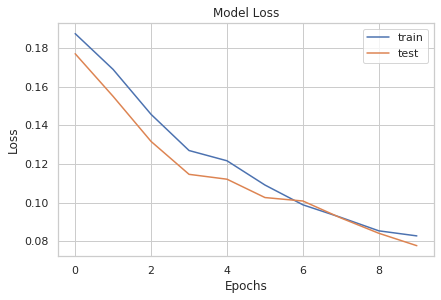

In [96]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

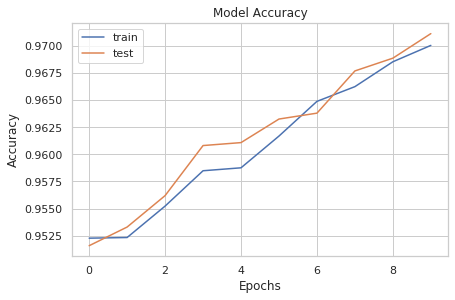

In [97]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

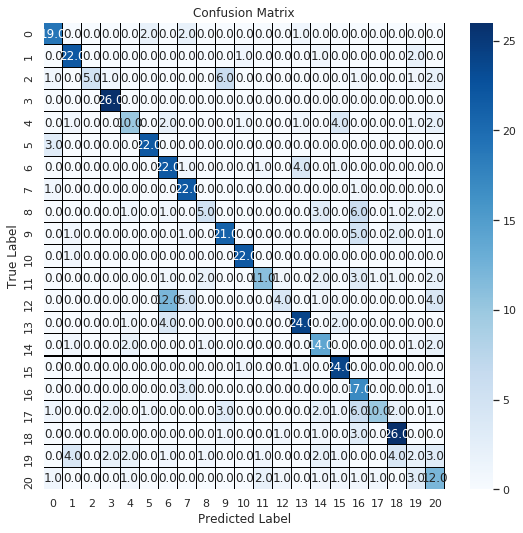

In [99]:
import seaborn as sns
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()